# 18-9. 프로젝트 : 다양한 OCR모델 비교하기

# Step1. 검증용 데이터셋 준비

In [1]:
from google.cloud import vision

import io
import cv2
from PIL import Image, ImageDraw
from enum import Enum
import matplotlib.pyplot as plt
import pandas as pd

import os

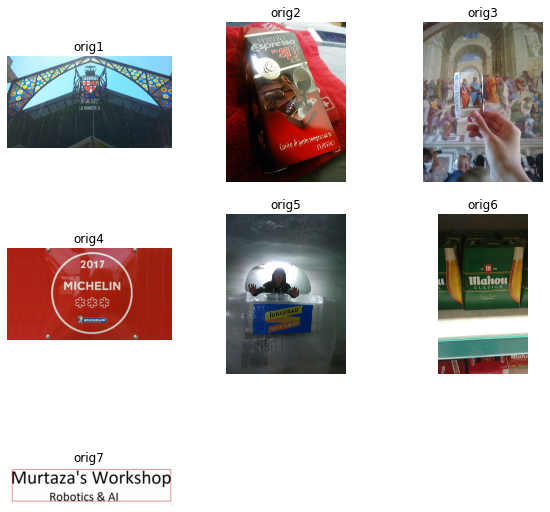

In [2]:
eng_img_list = []
eng_img_name = []
 
plt.figure(figsize=(10,10))
for i in range(1,8):
    #plt.figure(figsize=(10,10))
    ax = plt.subplot(3,3,i)
    path = os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig'+str(i)+'.jpg'
    english_img = cv2.imread(path)
    english_img = cv2.cvtColor(english_img, cv2.COLOR_BGR2RGB)
    eng_img_name.append('orig'+str(i))
    plt.title('orig'+str(i))
    plt.imshow(english_img)
    plt.axis("off")

# Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
## Step2-1. Google Cloud Vision API 사용

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    #print('response :',response)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

## Step2-1-1. Google Cloud Vision API 출력 단어 확인
* 이미지에 대해 인식한 단어를 리턴해주는 구글 비젼 API 이다.
* MERCAT인데 MERCAN으로 잘못 인식했다.
* SJOSEP인데 SJISEP으로 잘못 인식했다.
* 동그라미 문양을 00으로 잘못 인식했다.

In [4]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig1.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-rw-r-- 1 aiffel-dj17 aiffel-dj17 2355  3월 16 10:23 /home/aiffel-dj17/aiffel/ocr_python/my_google_api_key.json
Texts:

"MERCAN
SJISEP
00
LA BOQUERIA
"

"MERCAN"

"SJISEP"

"00"

"LA"

"BOQUERIA"
bounds: (1956,1286),(2335,1281),(2336,1381),(1957,1386)


## Step2-1-2. Google Cloud Vision API x,y 좌표 확인
* response값이 무엇인지 확인해 보았다.
* 안에 vertices로 묶어진 x,y 좌표가 있었다.
* x,y 좌표만 출력해보기 위해 함수를 만들었다.

In [5]:
def return_response(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    return response

response_x_y = return_response(path)
str_response_x_y = str(response_x_y)
#print( str_response_x_y)
print( str_response_x_y[0])
print( str_response_x_y)

t
text_annotations {
  locale: "es"
  description: "MERCAN\nSJISEP\n00\nLA BOQUERIA\n"
  bounding_poly {
    vertices {
      x: 189
      y: 521
    }
    vertices {
      x: 2336
      y: 521
    }
    vertices {
      x: 2336
      y: 1387
    }
    vertices {
      x: 189
      y: 1387
    }
  }
}
text_annotations {
  description: "MERCAN"
  bounding_poly {
    vertices {
      x: 1890
      y: 538
    }
    vertices {
      x: 2292
      y: 521
    }
    vertices {
      x: 2296
      y: 635
    }
    vertices {
      x: 1895
      y: 652
    }
  }
}
text_annotations {
  description: "SJISEP"
  bounding_poly {
    vertices {
      x: 1844
      y: 1095
    }
    vertices {
      x: 2311
      y: 1082
    }
    vertices {
      x: 2314
      y: 1214
    }
    vertices {
      x: 1848
      y: 1227
    }
  }
}
text_annotations {
  description: "00"
  bounding_poly {
    vertices {
      x: 254
      y: 1144
    }
    vertices {
      x: 416
      y: 1243
    }
    vertices {
      x

## Step2-1-3. Google Cloud Vision API x,y 좌표만 출력해보기
* text.bounding_poly.vertices 출력 결과가 x,y만 나온다는 것을 확인했다.

In [6]:
def return_vertices(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    #print('response :',response)
    texts = response.text_annotations
    #print('Texts:')
    text_x_y = []
    for text in texts:
        #print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])
        #print(text.bounding_poly.vertices)
        text_x_y.append(text.bounding_poly.vertices)
    return text_x_y

x_y = return_vertices(path)
print(x_y[0])

[x: 189
y: 521
, x: 2336
y: 521
, x: 2336
y: 1387
, x: 189
y: 1387
]


## Step2-1-4. text.bounding_poly.vertices 변수 활용하여 이미지 박싱하기
* 각 단어의 x,y 좌표에 대해 이미지 박싱을 한 후 폴더에 저장하고, 이를 다시 불러와서 합쳤다.
* 참조 :https://learndataanalysis.org/google-vision-api-draw-square-borders-based-on-vertices-values/

In [7]:
from google.cloud import vision
import io
client = vision.ImageAnnotatorClient()

with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

response = client.text_detection(image=image)
#print('response :',response)
texts = response.text_annotations

In [8]:
import io
from PIL import Image, ImageDraw, ImageFont


def drawVertices(image_source, vertices, display_text=''):

    pillow_img = Image.open(io.BytesIO(image_source))
    x, y, z= np.array(pillow_img).shape
    box_width=(x+y)//2//100//2
    draw = ImageDraw.Draw(pillow_img)
    for i in range(len(vertices) - 1):
        draw.line(((vertices[i].x, vertices[i].y), (vertices[i + 1].x, vertices[i + 1].y)),
                fill='red',
                width=box_width
        )

    draw.line(((vertices[len(vertices) - 1].x, vertices[len(vertices) - 1].y),
               (vertices[0].x, vertices[0].y)),
               fill='red',
               width=box_width
    )

    #font = ImageFont.truetype('arial.ttf', 16)
    #draw.text((vertices[0].x + 10, vertices[0].y),
              #font=font, text=display_text, 
              #fill=(255, 255, 255))
    #pillow_img.show()
    path = os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/'
    path = path + display_text + '.jpg'
    pillow_img.save(path)
    detect_img = cv2.imread(path)
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    #plt.title(display_text)
    #plt.imshow(detect_img)
    #plt.show()
    

    return detect_img, display_text

In [9]:
from google.cloud import vision
import io
import pandas as pd
import cv2
import numpy as np

path = os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig1.jpg'
image  = Image.open(path)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

client = vision.ImageAnnotatorClient()
with io.open(path, 'rb') as image_file:
        content = image_file.read()


image = vision.Image(content=content)

response = client.text_detection(image=image)

texts = response.text_annotations

img_list = []
text_list = []

for text in texts:
    vertices = text.bounding_poly.vertices
    detect_i, display_t = drawVertices(content, vertices, text.description) #content = 이미지, x,y 좌표 =vertices, text.description = 단어
    img_list.append(detect_i)
    text_list.append(display_t)

## Step2-1-5. 합치는방법 1 : cv2.addWeighted()
* 이 방법은 가중치를 이용하여 두 이미지를 합치는데 이는 문제가 박스 색이 점점 흐려진다.
* 참조 : https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220503082434&proxyReferer=https:%2F%2Fwww.google.com%2F

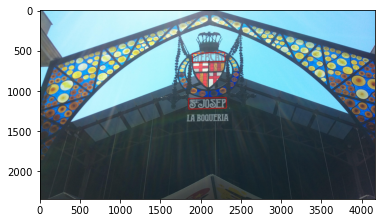

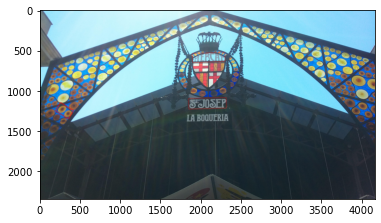

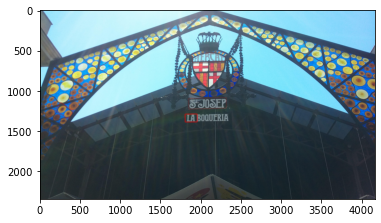

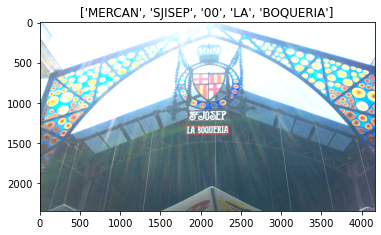

In [10]:
dst = cv2.addWeighted(img_list[1], 0.5, img_list[2], 0.5, 0)
plt.imshow(dst)
plt.show()
dst = cv2.addWeighted(dst, 0.5, img_list[3], 0.5, 0)
plt.imshow(dst)
plt.show()
dst = cv2.addWeighted(dst, 0.5, img_list[4], 0.5, 0)
plt.imshow(dst)
plt.show()
dst = cv2.addWeighted(dst, 1, img_list[5], 1, 0)
plt.title(text_list[1:])
plt.imshow(dst)
plt.show()

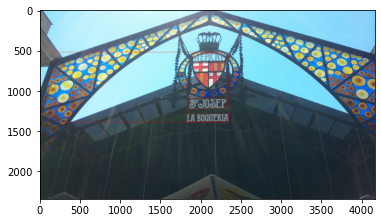

In [11]:
image_data = img_list
dst = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(image_data[i], alpha, dst, beta, 0.0)
        
plt.imshow(dst)
plt.show()

## Step2-1-6. 합치는방법 2 : cv2.add()
* 이 방법은 그냥 단순히 두 이미지를 합치는데 이는 이미지 색이 깨진다.

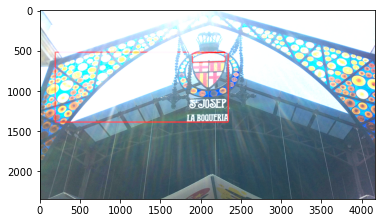

In [12]:
add_img=cv2.add(img_list[0],img_list[1])
plt.imshow(add_img)
plt.show()

## Step2-1-7. 합치는방법 3 : cv2.bitwise_or()
* 이는 or 연산자로 이미지를 합치는 방법이다. 
* and나 xor도 테스트 해봤지만 or 연산자가 가장 결과가 좋았다.
* 이 방법을 선택하기로 했다.
* 참조 : https://copycoding.tistory.com/156

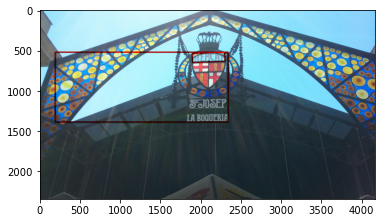

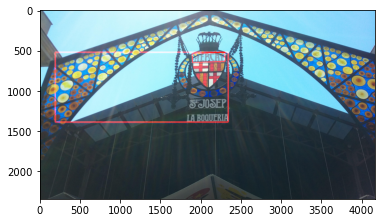

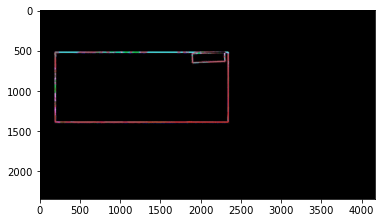

In [13]:
bitAnd = cv2.bitwise_and(img_list[0],img_list[1])
plt.imshow(bitAnd)
plt.show()
bitOr = cv2.bitwise_or(img_list[0],img_list[1])
plt.imshow(bitOr)
plt.show()
bitXor = cv2.bitwise_xor(img_list[0],img_list[1])
plt.imshow(bitXor)
plt.show()

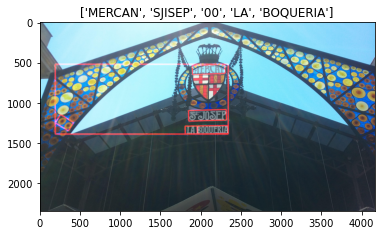

In [14]:
boxing_image_list = []
image_data = img_list
dst = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        dst = cv2.bitwise_or(image_data[i], dst)

plt.title(text_list[1:])        
plt.imshow(dst)
plt.show()

#boxing_image_list.append(dst)

## Step2-1-8. 여러 이미지에 적용하기
* orig1 ~ orig6 이미지에 적용했다.

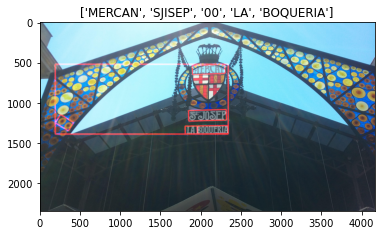

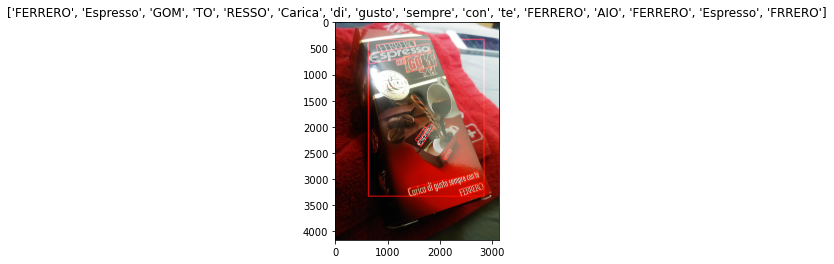

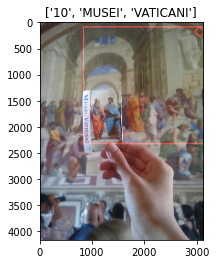

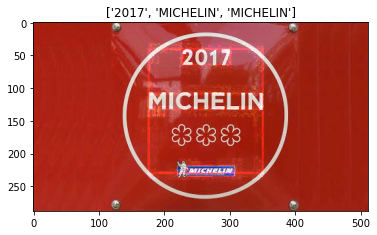

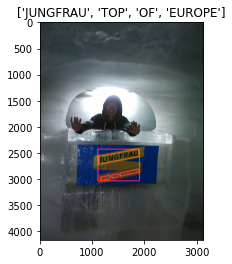

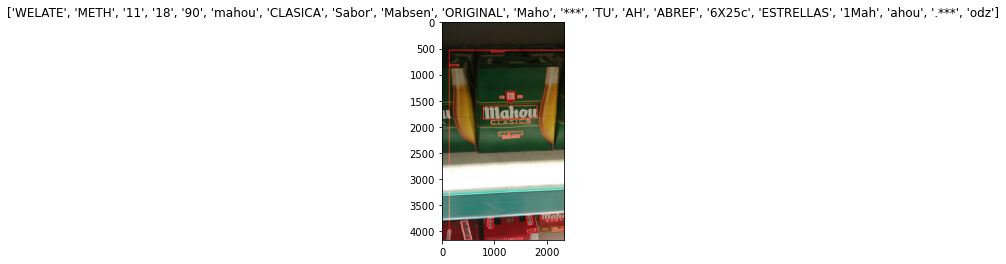

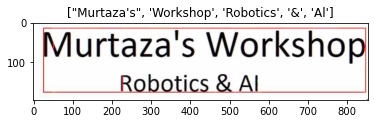

In [15]:
def make_box(name): 
    path = os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/' + name + '.jpg'
    image  = Image.open(path)

    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

    client = vision.ImageAnnotatorClient()
    with io.open(path, 'rb') as image_file:
            content = image_file.read()


    image = vision.Image(content=content)

    response = client.text_detection(image=image)

    texts = response.text_annotations

    img_list = []
    text_list = []

    for text in texts:
        vertices = text.bounding_poly.vertices
        detect_i, display_t = drawVertices(content, vertices, text.description) #content = 이미지, x,y 좌표 =vertices, text.description = 단어
        img_list.append(detect_i)
        text_list.append(display_t)

    image_data = img_list
    dst = image_data[0]
    for i in range(len(image_data)):
        if i == 0:
            pass
        else:
            dst = cv2.bitwise_or(image_data[i], dst)

    return dst, text_list


text_list_list=[]
for eng in eng_img_name :
    dst, text_list = make_box(eng)
    
    boxing_image_list.append(dst)
    text_list_list.append(text_list)
    

i=0
for img in boxing_image_list :
    plt.title(text_list_list[i][1:])        
    plt.imshow(img)
    plt.show()
    i=i+1



## Step 3-1. Google Vision API 결과 정리
### orig1
- MERCAT인데 MERCAN으로 잘못 인식했다.
- SJOSEP인데 SJISEP으로 잘못 인식했다.
- 동그라미 문양을 00으로 잘못 인식했다.

### orig2
- GO 단어를 GOM으로 잘못 인식했다.
- 전체적으로 잘 인식했다.

### orig3
- 문양을 10으로 잘못 인식했다.

### orig4
- 잘 인식했다.

### orig5
- 잘 인식했다.

### orig6
- 6x25d를 6x25c로 잘못 인식했다. 그래도 거꾸로된 글자였는데 비슷하게 인식했다.
- 필기체도 잘 인식했다.

### orig7
- & 문자도 8로인식하지 않고 잘 인식했다.

## Step2-2. keras-ocr 사용

In [16]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj17/.keras-ocr/craft_mlt_25k.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Looking for /home/aiffel-dj17/.keras-ocr/crnn_kurapan.h5


In [17]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig1.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig2.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig3.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig4.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig5.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig6.jpg',   
    os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig7.jpg',    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


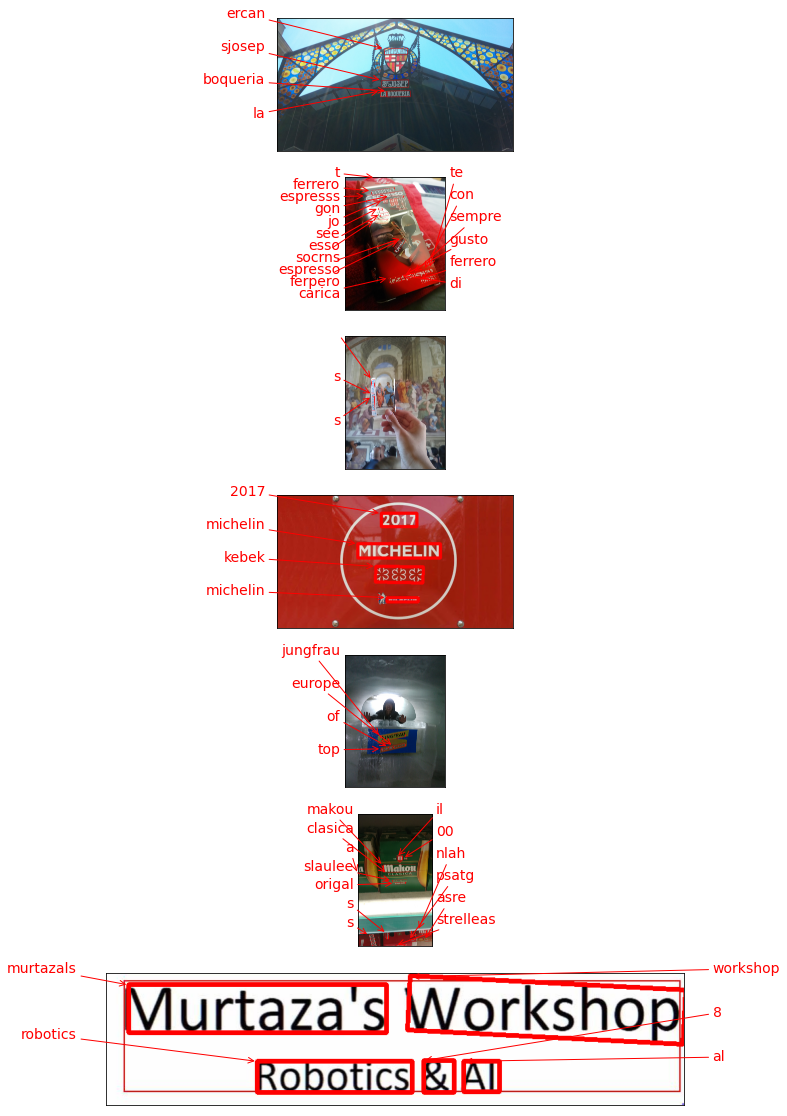

In [18]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Step 3-2. Google Vision API이미지 결과 정리
* 대소문자 구분이 없다.
* 화살표로 친절히 위치를 알려준다.

### orig1
- MERCAT인데 ercan으로 잘못 인식했다.

### orig2
- ARY라는 수건의 흐릿한 문자도 인식하려 했으나 t로 잘못 인식했다.
- go를 gon으로 잘못 인식했다.
- fee를 see로 잘못 인식했다.
- to를 jo로 잘못 인식했다.
- 아래의 ferrero를 ferpero로 잘못 인식했다.

### orig3
- 단어를 S로 인식했다. 전체적으로 인식하지 못한 것 같다.

### orig4
- 미쉐린 별 문양을 kebek으로 잘못 인식했다.

### orig5
- 잘 인식했다.

### orig6
- mahou를 makou로 잘못 인식했다.
- sabor을 slaulee로 잘못 인식했다.
- original을 origal로 잘못 인식했다.
- 1890을 il00으로 잘못 인식했다.

### orig7
- &문자를 8로 잘못 인식했다.

## Step2-3. Tesseract OCR 사용
* 참고 : https://nanonets.com/blog/ocr-with-tesseract/

In [19]:
# import the necessary packages
from pytesseract import Output
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [20]:
img = cv2.imread(os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/orig7.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
text_tess = pytesseract.image_to_string(img)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


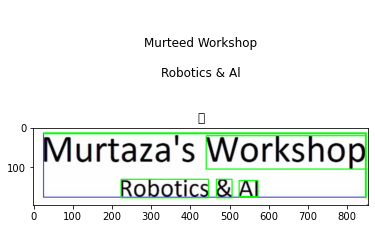

In [21]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.title(text_tess)
plt.imshow(img)
plt.show()

In [33]:
def Tesseract_OCR(name):
    img = cv2.imread(os.getenv('HOME')+'/aiffel/ocr_python/my_ocr_img_english/'+name+'.jpg')

    text_tess = pytesseract.image_to_string(img)
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    print(d.keys())
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(text_tess)
    plt.imshow(img)
    plt.show()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


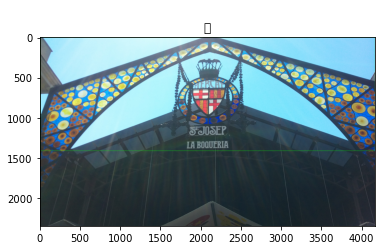

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


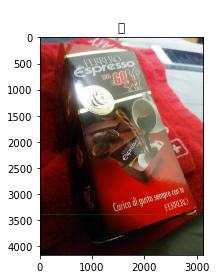

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


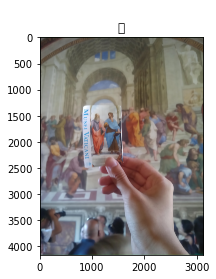

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


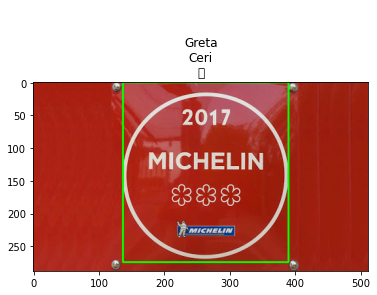

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


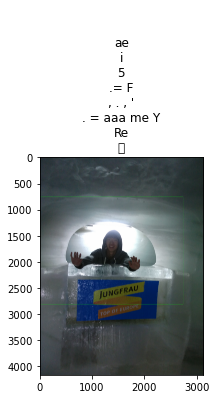

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


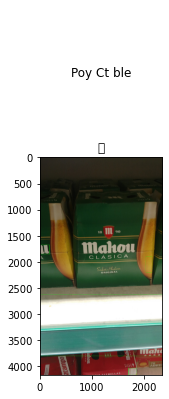

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel-dj17/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


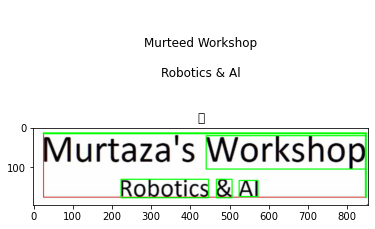

In [34]:
for img in eng_img_name :
    Tesseract_OCR(img)

## Step 3-3. Tesseract OCR 결과 정리
* Tesseract는 직접 찍은 사진에서 단어 인식은 매우 안좋은 결과를 보여줬다.
* 직접 찍은 사진에서 아예 단어를 인식하지 못하는 경우가 많고 인식하더라도 이상한 단어가 나왔다.
* 컴퓨터로 작성한 글자를 캡쳐한 이미지에서는 준수한 성능을 보여줬다.
* murtaza's 라는 단어를 Murteed로 잘못 인식하였다.
* &문자도 8로 인식하지 않고 잘 인식하였다.
* pdf같은 파일에서 글자인식할 때는 준수한 성능을 보일 것으로 예상된다.

### orig1
- None

### orig2
- None

### orig3
- None

### orig4
- Greta, Ceri

### orig5
- ae,i,5, .=F, ,.,' , .=aaa me Y, Re

### orig6
- Poy Ct ble

### orig7
- Murteed Workshop Robotics&AI

## Step 4. Google OCR API, keras-ocr, Tesseract OCR 결과 분석
* Google OCR API경우, 가장 좋은 성능을 보이는 것 같다. 눈으로 잘 안보이는 이미지까지 잘 인식한다. 하지만 시각화 하는데 힘들다.
*  keras-ocr 경우, 전체적으로 준수한 성능을 보인다. 하지만 영단어같은 문자는 준수하게 인식하는데 특수문자같은 문자는 안좋은 성능을 보인다. 시각화 하는데는 편했다.
* Tesseract OCR 가장 낮은 성능을 보인다. 그나마 PDF를 캡쳐한 이미지같은 깔끔한 이미지 OCR은 조금 양호한데, 그래도 이것도 완벽하게 OCR하지 못한다. 사용 안하는 것이 좋은 것 같다.

# 마치며...
* 구글 api, 테서렉트는 예제에서 단어만 출력해서 이를 시각화 하느라 힘들었다. 구글링과 유튜브로 이것 저것 검색하고 수정하며 시각화를 진행했다. 단어별 출력 결과를 한 이미지로 출력하기 위해 이미지를 합치는 과정도 공부할 수 있었다. 처음에 cv.addweight함수를 고집했는데 테스트해보니 이미지 비트연산 함수가 더 좋은 결과가 나왔다. 테서렉트는 성능이 너무 안좋은 것 같다.